In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-08-22 09:36:18.830069


In [2]:
%qtconsole

In [3]:
# define directories
baseDir = os.getcwd()
dataDir = r'D:/MothSimulations/11c-AggressiveManeuver/Qstore/hws_am_con/'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)

In [4]:
# read in data
dataName = "Qstore_1_hws_am_con"
Qmat = scipy.io.loadmat(os.path.join(dataDir, dataName + ".mat"))

In [5]:
Qmat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Qstore'])

In [6]:
Qmat['Qstore'].shape

(100, 1)

In [ ]:
# 

timestep = 99 # can go up to 99


vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
keys = Qmat['Qstore'][timestep,0].dtype.descr
keys = np.array(keys)[:, 0]

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i]
    val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
    exec(key + '=val')
    
print(keys)

In [ ]:
for ii in keys:
    print(ii, vals[ii].shape)

In [ ]:
pd.DataFrame(np.hstack(vals["ICs"][0,:])).T.head()

In [ ]:
np.hstack(vals["tau0"][0,:])

In [ ]:
pd.DataFrame(np.hstack(vals["ICs"][0,:])).T.drop_duplicates()

In [ ]:
vals["bigQ"][0, 1].shape

In [ ]:
vals["bigQ"].shape

In [95]:
# each timestep has 2500 Monte Carlo Simulations
# each file contains 100 timesteps

simNum = 2 # can go up to 2500
timestep = 99 # can go up to 99

stt = time.time()
with open(os.path.join(dataOutput, dataName + '.csv'), 'a') as f:
    for timestep in range(100):
        vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
        keys = Qmat['Qstore'][timestep,0].dtype.descr
        keys = np.array(keys)[:, 0]

        # Assemble the keys and values into variables with the same name as that used in MATLAB
        for i in range(len(keys)):
            key = keys[i]
            val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
            exec(key + '=val')

        for simNum in range(10):
            tt = pd.DataFrame(vals["bigQ"][0, simNum], columns=["x","y","theta", "phi", "xd", "yd", "thetad", "phid"])
            tt["F"] = np.concatenate(vals["F"][0]).ravel()[simNum]
            tt["alpha"] = np.concatenate(vals["alpha"][0]).ravel()[simNum]
            tt["tau0"] = np.concatenate(vals["tau0"][0]).ravel()[simNum]
            tt["simNum"] = simNum
            tt["timestep"] = timestep

            # write to csv file
            if (simNum == 0) and (timestep == 0):
                header=True            
            else:
                header = False
            tt.to_csv(f, header=header)
    print(time.time() - stt )

4.683861017227173


In [70]:
np.savetxt(os.path.join(dataOutput, dataName + '.csv'), 
           np.array(["x","y","theta", "phi", "xd", "yd", "thetad", "phid", "F", "alpha", "tau0", "simNum", "timestep"]).reshape(1,-1), fmt="%s", 
          delimiter = ",")

In [96]:
# each timestep has 2500 Monte Carlo Simulations
# each file contains 100 timesteps

simNum = 2 # can go up to 2500
timestep = 99 # can go up to 99
tt = np.zeros((100, 13))

stt = time.time()
with open(os.path.join(dataOutput, dataName + '.csv'), 'a') as f:
    np.savetxt(f, np.array(["x","y","theta", "phi", "xd", "yd", "thetad", "phid", "F", "alpha", "tau0", "simNum", "timestep"]).reshape(1,-1), 
               fmt="%s", 
          delimiter = ",")
    for timestep in range(100):
        vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
        keys = Qmat['Qstore'][timestep,0].dtype.descr
        keys = np.array(keys)[:, 0]

        # Assemble the keys and values into variables with the same name as that used in MATLAB
        for i in range(len(keys)):
            key = keys[i]
            val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
            exec(key + '=val')

        for simNum in range(10):
            
            tt[:, 0:8] = vals["bigQ"][0, simNum]
            tt[:, [8]] = np.repeat(np.concatenate(vals["F"][0]).ravel()[simNum], 100).reshape(-1,1)
            tt[:, [9]] = np.repeat(np.concatenate(vals["alpha"][0]).ravel()[simNum], 100).reshape(-1,1)
            tt[:, [10]] = np.repeat(np.concatenate(vals["tau0"][0]).ravel()[simNum], 100).reshape(-1,1)
            tt[:, [11]] =  np.repeat(simNum, 100).reshape(-1,1)
            tt[:, [12]] = np.repeat(timestep, 100).reshape(-1,1)

            # write to csv file
            np.savetxt(f, tt, delimiter = ",")
    
    print(time.time() - stt )

3.1610934734344482


In [133]:
import csv

In [153]:
bigF = np.zeros((100*2500*100, 13))
if os.path.isfile(os.path.join(dataOutput, dataName + '.csv')):
    os.remove(os.path.join(dataOutput, dataName + '.csv'))
stt = time.time()

with open(os.path.join(dataOutput, dataName + '.csv'), 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(np.array(["x","y","theta", "phi", "xd", "yd", "thetad", "phid", "F", "alpha", "tau0", "simNum", "timestep"]).reshape(1,-1))
    writer.writerows(bigF)
print(time.time() - stt )

88.31370806694031


In [151]:
if os.path.isfile(os.path.join(dataOutput, dataName + '.csv')):
    os.remove(os.path.join(dataOutput, dataName + '.csv'))
stt = time.time()
with open(os.path.join(dataOutput, dataName + '.csv'), 'a') as f:
    np.savetxt(f, bigF, delimiter = ",")
print(time.time() - stt )

2.1567561626434326


In [132]:
stt = time.time()
bb = pd.DataFrame(tt)
bb.to_csv(os.path.join(r"C:\Users\calli\Desktop", dataName + '.csv'))
print(time.time() - stt )

0.05185127258300781


In [156]:
# each timestep has 2500 Monte Carlo Simulations
# each file contains 100 timesteps

simNum = 2 # can go up to 2500
timestep = 99 # can go up to 99
tt = np.zeros((100, 13))
bigF = np.zeros((100*2500*100, 13))

stt = time.time()
ctr = 0

for timestep in range(100):
    if np.mod(timestep, 10) == 0: 
        print(timestep)
    vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
    keys = Qmat['Qstore'][timestep,0].dtype.descr
    keys = np.array(keys)[:, 0]

    # Assemble the keys and values into variables with the same name as that used in MATLAB
    for i in range(len(keys)):
        key = keys[i]
        val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
        exec(key + '=val')

    for simNum in range(2500):
        #print(timestep, simNum)
        # refref change 100's to nrow(tt)
        ttRows = tt.shape[0]
        tt[:, 0:8] = vals["bigQ"][0, simNum]
        tt[:, [8]] = np.repeat(np.concatenate(vals["F"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [9]] = np.repeat(np.concatenate(vals["alpha"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [10]] = np.repeat(np.concatenate(vals["tau0"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [11]] =  np.repeat(simNum, ttRows).reshape(-1,1)
        tt[:, [12]] = np.repeat(timestep, ttRows).reshape(-1,1)
        bigF[ctr:ctr+ttRows, :] = tt
        ctr += ttRows

0
10
20
30
40
50
60
70
80
90


In [157]:
            
# write to csv file
with open(os.path.join(dataOutput, dataName + '.csv'), 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(np.array(["x","y","theta", "phi", "xd", "yd", "thetad", "phid", "F", "alpha", "tau0", "simNum", "timestep"]).reshape(1,-1))
    writer.writerows(bigF)
    
    print(time.time() - stt ) # 12 minutes to save a single csv file

719.0766298770905


In [165]:
# save as hdf5 instead of csv (quite a bit faster)
bf2.to_hdf(os.path.join(dataOutput, dataName + '.hdf5'), "data", mode='w')


In [158]:
719 / 60

11.983333333333333

In [159]:
stt = time.time()
bf2 = pd.read_csv(os.path.join(dataOutput, dataName + '.csv'))
print(time.time() - stt ) # 52 seconds to read in
bf2.head()

52.14057374000549


,x,y,theta,phi,xd,yd,thetad,phid,F,alpha,tau0,simNum,timestep
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,35134.927163,5.362883,-47803.351578,0.0,0.0
1,0.000374,0.000165,0.784926,3.927017,4.627796,0.698741,-3.057799,0.147343,35134.927163,5.362883,-47803.351578,0.0,0.0
2,0.001948,0.000206,0.784294,3.927042,10.965261,-0.315998,-3.165112,0.099534,35134.927163,5.362883,-47803.351578,0.0,0.0
3,0.004812,0.000035,0.783649,3.927057,17.332404,-1.364990,-3.220319,0.048239,35134.927163,5.362883,-47803.351578,0.0,0.0
4,0.008954,-0.000347,0.782994,3.927061,23.701903,-2.420945,-3.270553,-0.003423,35134.927163,5.362883,-47803.351578,0.0,0.0


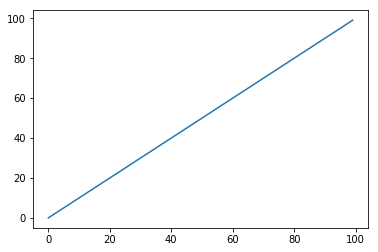

In [163]:
plt.plot(np.unique(bf2.timestep))

In [106]:
bigF[0:100, :] = tt
pd.DataFrame(bigF).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.676007,-2.506200,0.773379,4.530785,-180.595523,-157.133846,1.828670,4.221191,37551.256598,2.955086,-7033.624638,9.0,99.0
1,-0.712917,-2.538508,0.774019,4.531628,-185.326751,-162.171404,3.597065,4.177210,37551.256598,2.955086,-7033.624638,9.0,99.0
2,-0.750936,-2.571685,0.774757,4.532478,-191.018251,-166.243182,3.692371,4.240377,37551.256598,2.955086,-7033.624638,9.0,99.0
3,-0.790101,-2.605678,0.775509,4.533341,-196.715420,-170.310324,3.772564,4.304521,37551.256598,2.955086,-7033.624638,9.0,99.0
4,-0.830416,-2.640492,0.776276,4.534217,-202.430507,-174.360654,3.816357,4.371004,37551.256598,2.955086,-7033.624638,9.0,99.0


In [32]:
simNum = 2 # can go up to 2500
timestep = 99 # can go up to 99
vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
keys = Qmat['Qstore'][timestep,0].dtype.descr
keys = np.array(keys)[:, 0]

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i]
    val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
    exec(key + '=val')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.676007,-2.506200,0.773379,4.530785,-180.595523,-157.133846,1.828670,4.221191,37551.256598,2.955086,-7033.624638,9.0,99.0
1,-0.712917,-2.538508,0.774019,4.531628,-185.326751,-162.171404,3.597065,4.177210,37551.256598,2.955086,-7033.624638,9.0,99.0
2,-0.750936,-2.571685,0.774757,4.532478,-191.018251,-166.243182,3.692371,4.240377,37551.256598,2.955086,-7033.624638,9.0,99.0
3,-0.790101,-2.605678,0.775509,4.533341,-196.715420,-170.310324,3.772564,4.304521,37551.256598,2.955086,-7033.624638,9.0,99.0
4,-0.830416,-2.640492,0.776276,4.534217,-202.430507,-174.360654,3.816357,4.371004,37551.256598,2.955086,-7033.624638,9.0,99.0


In [92]:
tt = vals["bigQ"][0, simNum]
F =  np.repeat(np.concatenate(vals["F"][0]).ravel()[simNum], 100).reshape(-1,1)
alpha = np.repeat(np.concatenate(vals["alpha"][0]).ravel()[simNum], 100).reshape(-1,1)
tau0 = np.repeat(np.concatenate(vals["tau0"][0]).ravel()[simNum], 100).reshape(-1,1)
simNum_ =  np.repeat(simNum, 100).reshape(-1,1)
timestep_ = np.repeat(timestep, 100).reshape(-1,1)
pd.DataFrame(np.hstack([tt, F, alpha, tau0, simNum_, timestep_]))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.676007,-2.506200,0.773379,4.530785,-180.595523,-157.133846,1.828670,4.221191,37551.256598,2.955086,-7033.624638,9.0,99.0
1,-0.712917,-2.538508,0.774019,4.531628,-185.326751,-162.171404,3.597065,4.177210,37551.256598,2.955086,-7033.624638,9.0,99.0
2,-0.750936,-2.571685,0.774757,4.532478,-191.018251,-166.243182,3.692371,4.240377,37551.256598,2.955086,-7033.624638,9.0,99.0
3,-0.790101,-2.605678,0.775509,4.533341,-196.715420,-170.310324,3.772564,4.304521,37551.256598,2.955086,-7033.624638,9.0,99.0
4,-0.830416,-2.640492,0.776276,4.534217,-202.430507,-174.360654,3.816357,4.371004,37551.256598,2.955086,-7033.624638,9.0,99.0
5,-0.871888,-2.676129,0.777054,4.535107,-208.125484,-178.432272,3.889507,4.435616,37551.256598,2.955086,-7033.624638,9.0,99.0
6,-0.914508,-2.712586,0.777847,4.536009,-213.823926,-182.501584,3.951113,4.500976,37551.256598,2.955086,-7033.624638,9.0,99.0
7,-0.958281,-2.749868,0.778652,4.536925,-219.521891,-186.572569,4.007888,4.566654,37551.256598,2.955086,-7033.624638,9.0,99.0
8,-1.003202,-2.787973,0.779471,4.537854,-225.210027,-190.654545,4.075906,4.631621,37551.256598,2.955086,-7033.624638,9.0,99.0
9,-1.049275,-2.826904,0.780302,4.538797,-230.888276,-194.747558,4.155117,4.695881,37551.256598,2.955086,-7033.624638,9.0,99.0


In [48]:
with open(os.path.join(dataOutput, dataName + '.csv'), 'a') as f:
    np.savetxt(f, np.hstack([tt, F, alpha, tau0, simNum_, timestep_]))

In [43]:
np.savetxt(os.path.join(dataOutput, dataName + ".csv"), np.hstack([tt, F, alpha, tau0, simNum_, timestep_]))

In [40]:
pd.DataFrame(np.hstack([tt, F, alpha, tau0, simNum_, timestep_]))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.676007,-2.506200,0.773379,4.530785,-180.595523,-157.133846,1.828670,4.221191,28554.192336,0.47771,1596.250869,2.0,99.0
1,-0.712122,-2.537663,0.774098,4.531613,-177.646561,-153.657239,4.078843,4.055595,28554.192336,0.47771,1596.250869,2.0,99.0
2,-0.747840,-2.568223,0.774927,4.532430,-175.983530,-148.888680,4.102263,4.032593,28554.192336,0.47771,1596.250869,2.0,99.0
3,-0.783226,-2.597812,0.775752,4.533243,-174.342409,-144.101003,4.094896,4.011565,28554.192336,0.47771,1596.250869,2.0,99.0
4,-0.818286,-2.626444,0.776575,4.534051,-172.716211,-139.301253,4.068801,3.991740,28554.192336,0.47771,1596.250869,2.0,99.0
5,-0.853014,-2.654099,0.777394,4.534856,-171.097130,-134.497311,4.037625,3.972244,28554.192336,0.47771,1596.250869,2.0,99.0
6,-0.887414,-2.680784,0.778209,4.535656,-169.479584,-129.694722,4.010938,3.952464,28554.192336,0.47771,1596.250869,2.0,99.0
7,-0.921488,-2.706504,0.779019,4.536452,-167.868234,-124.888809,3.980608,3.932920,28554.192336,0.47771,1596.250869,2.0,99.0
8,-0.955236,-2.731251,0.779825,4.537245,-166.245693,-120.096873,3.976671,3.911689,28554.192336,0.47771,1596.250869,2.0,99.0
9,-0.988658,-2.755027,0.780626,4.538033,-164.633047,-115.297908,3.962668,3.891105,28554.192336,0.47771,1596.250869,2.0,99.0


In [37]:
tt.shape

(100, 8)

In [38]:
F

28554.192335923824

In [28]:
alpha.shape

(100, 1)

In [29]:
tau0.shape

(100, 1)

In [30]:
simNum.shape

(10000, 1)

In [33]:
simNum

2

In [ ]:
dd['timestep'] = (np.floor(np.arange(0, 100, step = 0.01))).astype(int)
cols = dd.columns.tolist()
dd = dd[[cols[-1]] + cols[:-1]] 

In [ ]:
dd.head()

In [ ]:
#%qtconsole

In [ ]:
cc = np.zeros(Qdta.shape).reshape((-1, 100*8))
cc.shape

In [ ]:
# another possible way to rearrange the data
stt = time.time()

ss = 8 # number of columns to repeat
cctr = 0 # output row counter


rctr = 0 # row counter for input data
    
while rctr < Qdta.shape[0]:
    
    ii = 0 # column counter for input data
    while ii < Qdta.shape[1]:
        a = np.array(dd.iloc[rctr:(rctr + 100), ii + 2:ii + 2 + ss])
        bb = np.array(np.zeros(a.shape)).reshape([1, -1])
        bb.shape

        for kk in np.arange(0, a.shape[0], step = 1):
            bb[0, kk*ss:(kk+1)*ss] = a[kk, 0:ss]  

        ii += ss
    
        cc[cctr, :] = bb
        cctr += 1
    # update row counter
    print(str(cctr) + " of " + str(cc.shape[0]))
    rctr += 100

    
print(str(np.round(time.time() - stt)) + " Seconds")

In [ ]:
plt.figure(figsize=(20,100))
plt.imshow(cc, cmap='hot', interpolation='nearest')

plt.show()

In [ ]:
# double check
for ii in np.arange(5000, 10000):
    plt.plot(cc[ii, np.arange(0, 800, step = 8)], cc[ii, np.arange(1, 800, step = 8)])

In [ ]:
# make data frame and name columns
tsDf = pd.DataFrame(cc)

In [ ]:
tsDf["timestep"] = np.floor(np.arange(0,tsDf.shape[0]) / 2500).astype(int)
tsDf.head()

In [ ]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [ ]:
jj = 0
hh = []
for jj in range(100):
    hh.append([new_cols[ii] +"_" +str(jj) for ii in range(8)])

allCols = np.concatenate(hh)

In [ ]:
tsDf.columns = np.append(allCols, "timestep")

In [ ]:
tsDf.head()

In [ ]:
forceAngle = np.transpose(Vmat["ValSp3"])
fa = forceAngle.reshape((250000, 12), order = "C" )
fa2=  pd.DataFrame(fa)
fa2.columns = np.append([new_cols[ii] +"_" +str(99) for ii in range(8)], ["F", "alpha", "tau", "cost"])
fa2["Fx"] = fa2.F * np.cos(fa2.alpha)
fa2["Fy"] = fa2.F * np.sin(fa2.alpha)
fa2.shape

In [ ]:
combDF = pd.merge(tsDf.dropna(), fa2.dropna(), 
                  left_on = [new_cols[ii] +"_" +str(99) for ii in range(8)], 
                  right_on = [new_cols[ii] +"_" +str(99) for ii in range(8)], 
                  how = "inner")


In [ ]:
combDF.head()

In [ ]:
combDF.shape

In [ ]:
# show how many NA's were dropped
fa2.shape[0] - fa2.dropna().shape[0]

### Finished data munging

Now fit models

In [ ]:
X = combDF.iloc[:, np.concatenate((np.arange(0,8), np.arange(792,800)))].copy()
Y = combDF.iloc[:, [803, 805, 806]]

# # subtract x_0 and y_0 from everything
X.x_99 = X.x_99 - X.x_0
X.y_99 = X.y_99 - X.y_0

X.x_0 = X.y_0 = 0


In [ ]:
Y.head()

In [ ]:
X.tail()

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state = 123)

In [ ]:
# refref: scale test and training separately:
from sklearn.preprocessing import StandardScaler  
scalerX = StandardScaler()  
scalerY = StandardScaler()  

# Don't cheat - fit only on training data
scalerX.fit(Xtrain)  
scalerY.fit(Ytrain) 

Xtrain_scaled = scalerX.transform(Xtrain)  
Ytrain_scaled = scalerY.transform(Ytrain)  

# apply same transformation to test data
Xtest_scaled = scalerX.transform(Xtest)
Ytest_scaled = scalerY.transform(Ytest)

In [ ]:
xcheck = scalerX.inverse_transform(Xtrain_scaled)
np.allclose(xcheck, np.array(Xtrain))

In [ ]:
# save scalers
import pickle

# with open(os.path.join(dataDir, "StandardScaler_zerod.pkl"), 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([scalerX, scalerY], f)

In [ ]:
# del scalerX
# del scalerY

In [ ]:
# # Getting back the objects:
# with open(os.path.join(dataDir, "StandardScaler_zerod.pkl"), 'rb') as f:  # Python 3: open(..., 'rb')
#     scalerX, scalerY = pickle.load(f)

In [ ]:
# check scaler
plt.hist(Xtrain.iloc[:, 3])
plt.show()
plt.hist(Xtrain_scaled[:,3])
plt.show()

xcheck = scalerX.inverse_transform(Xtrain_scaled)
plt.hist(xcheck[:,3])

In [ ]:
print(Xtrain.shape,  Ytrain.shape, Xtest.shape, Ytest.shape)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# stt = time.time()
# mor = MultiOutputRegressor(RandomForestRegressor(500, n_jobs = 4)).fit(Xtrain_scaled, Ytrain_scaled)
# print(time.time() - stt) # ~ 13 minutes

In [ ]:
# # save RF model
# from sklearn.externals import joblib
# joblib.dump(mor, os.path.join(dataDir, "FitRF_Scaled2.pkl")) 

In [ ]:
# mpreds = mor.predict(Xtest_scaled)

In [ ]:
# plt.close("all")
# fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = 0.1, wspace=0.3)
# fig.suptitle('Predicted vs. acutal for Mulit-output Random Forest Regressor (500 trees)', fontsize=14, fontweight='bold')

# axs = axs.ravel()
# nms = ["tau", "Fx", "Fy"]


# for ii in range(3):
#     # read in image
    
#     try:
#         axs[ii].scatter(y = Ytest_scaled[:,ii],x = mpreds[:,ii], s = 1, c= 'indianred' )
#         axs[ii].set_xlabel("Predicted Value (Scaled)")
#         if(ii == 0):
#             axs[ii].set_ylabel("Actual Value\n(Scaled)")
#             axs[ii].set_xlim([-10, 5])
#         axs[ii].set_title(nms[ii])
#         axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'maroon')
#     except:
#         pass

    
# fig.savefig(os.path.join(figDir, "RFpreds_Scaled2.png"), dpi = 120, bbox_inches='tight')

## Multi-output neural network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor


In [ ]:
# stt = time.time()
# nn1 = MLPRegressor(solver='lbfgs', alpha=0,
#                   hidden_layer_sizes=(100, 6), max_iter=10000, 
#                   activation='tanh', verbose = True)
# nnMod = MultiOutputRegressor(nn1).fit(Xtrain_scaled, Ytrain_scaled)
# print(time.time() - stt) # takes 128 minutes on MBPro

In [ ]:
# # save nn, so I can reload without retraining
# from sklearn.externals import joblib
# joblib.dump(nnMod, os.path.join(dataDir, "TrainedNN_scaled_zerod.pkl")) 

In [ ]:
# load trained nn

In [ ]:
from sklearn.externals import joblib
nnMod = joblib.load(os.path.join(dataDir, "TrainedNN_scaled_zerod.pkl")) 

In [ ]:
nnpreds = nnMod.predict(Xtest_scaled)

In [ ]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal for 2-hidden-layer Neural Network', fontsize=14, fontweight='bold')

axs = axs.ravel()
nms = ["tau", "Fx", "Fy"]


for ii in range(3):
    # read in image
    
    try:
        axs[ii].scatter(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], s = 1 )
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'b')
    except:
        pass

    
fig.savefig(os.path.join(figDir, "NNPreds2_zerod.png"), dpi = 120, bbox_inches='tight')

# Compare simulation vs. nn preds for test set!

In [ ]:
s1 = pd.concat([Xtest, Ytest], axis = 1).reset_index(drop = True)

shuff2 = s1

# predictions
XX_scaled = scalerX.transform(shuff2.iloc[:, 0:16])
nnpreds3 = nnMod.predict(XX_scaled)

# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s2_1 = pd.concat([shuff2, preds1], axis = 1)
s2_1.head()

In [ ]:
s2_1.to_csv(os.path.join(dataDir, "simulationData5_withFinal_testset.csv"), index=False)
print(dataDir)

simSet1 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]


simSet1.to_csv(os.path.join(dataDir, "simulationDataset5_blinded_testset.csv"), index=False)
simSet1.head()

In [ ]:
simSet1.shape

___

# Generate a new dataset, that is similar to training set

In [ ]:
stds = Xtrain.std(axis = 0)
means = Xtrain.mean(axis = 0)
means

In [ ]:
stds.index

In [ ]:
from scipy.stats import norm
# Note, arguments are norm.pdf(xvals,mean, std dev))

sampList = []

ii = 0

for ii in range(len(stds.index)):
    indd = stds.index[ii]
    samps = np.random.normal(loc=means[indd], scale=stds[indd], size=1000)
    sampList.append(samps)

In [ ]:
generatedDatset = pd.DataFrame(np.transpose(sampList), columns = stds.index).reset_index(drop = True)
generatedDatset.head()
generatedDatset.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0']]

In [ ]:
sns.pairplot(Xtrain.sample(5000, random_state = 123).loc[:, ['theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0']].reset_index(drop = True))

In [ ]:
sns.pairplot(Xtrain.sample(5000, random_state = 123).loc[:, ['x_99', 'y_99','theta_99', 'phi_99', 'x_dot_99', 'y_dot_0', 'theta_dot_99',
       'phi_dot_99']].reset_index(drop = True))

In [ ]:
generatedDatset = pd.DataFrame(np.transpose(sampList), columns = stds.index).reset_index(drop = True)
generatedDatset.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0']] = Xtrain.sample(1000, random_state = 123).loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0']].reset_index(drop = True)

generatedDatset = Xtrain.sample(1000, random_state = 123).reset_index(drop = True)
generatedDatset.head()

In [ ]:
# make predictions for generated data
# predictions
XX_scaled = scalerX.transform(generatedDatset)
nnpreds3 = nnMod.predict(XX_scaled)

# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s5 = pd.concat([generatedDatset, preds1], axis = 1)
s5.head()

In [ ]:
plt.hist(Ytrain.tau)
plt.show()
plt.hist(s5.tau_pred)

In [ ]:
s5.to_csv(os.path.join(dataDir, "simulationData6_withFinal_generatedtestset.csv"), index=False)
print(dataDir)

simSet1 = s5.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]


simSet1.to_csv(os.path.join(dataDir, "simulationDataset6_blinded_generatedtestset.csv"), index=False)
simSet1.head()

In [ ]:
# draw samples from normal dist'n
samps = np.random.normal(loc=means['theta_0'], scale=stds['theta_0'], size=10000)
sns.kdeplot(samps, bw=.2)

In [ ]:
sns.kdeplot(Xtrain.theta_0, bw=.3)

In [ ]:
# refref: run simulation vs. nn preds for test set!


___
### Create dataset with same initial conditions and shuffle output conditions

In [ ]:
s1 = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800), [801, 802, 803]])].sample(1000, random_state = 1234)
s1.reset_index(inplace = True)

# set x_0 and y_0 to (0,0)  -- refref: may want to do this for training, actually
s1.x_99 = s1.x_99 - s1.x_0
s1.y_99 = s1.y_99 - s1.y_0

s1.x_0 = 0
s1.y_0 = 0

s1.head()

In [ ]:
s1.columns

In [ ]:
sTemp = s1.loc[:, ['x_99', 'y_99', 'theta_99', 'phi_99',
       'x_dot_99', 'y_dot_99', 'theta_dot_99', 'phi_dot_99']]
sInit = s1.loc[:, ['index', 'x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0',
       'theta_dot_0', 'phi_dot_0']]

shuff = sTemp.sample(sTemp.shape[0], random_state = 12346)
shuff2 = pd.concat([sInit, shuff.reset_index(drop = True)], axis = 1)



shuff2.tail()

In [ ]:
# predictions
XX_scaled = scalerX.transform(shuff2.iloc[:, 1:17])
nnpreds3 = nnMod.predict(XX_scaled)

# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s2_1 = pd.concat([shuff2, preds1], axis = 1)
s2_1.head()

In [ ]:
s2_1.to_csv(os.path.join(dataDir, "simulationData4_withFinal.csv"), index=False)
print(dataDir)

simSet1 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]


simSet1.to_csv(os.path.join(dataDir, "simulationDataset4_blinded.csv"), index=False)
simSet1.head()

In [ ]:
# refref: might get better predictions if we set initial X and Y to (0,0) and
# and transform output X and Y relative to the start

--- Dataset to check in Jorge's simulation ---

In [ ]:
## generate dataset for Jorge to send to model
s1 = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800), [801, 802, 803]])].sample(1000)
s1.head()

In [ ]:
# predictions
XX_scaled = scalerX.transform(s1.iloc[:, 0:16])
nnpreds2 = nnMod.predict(XX_scaled)

In [ ]:
s1.iloc[:, 0:16].shape

In [ ]:
s1["Fx"] = s1.F * np.cos(s1.alpha)
s1["Fy"] = s1.F * np.sin(s1.alpha)
s1.head()

In [ ]:
# compute F, alpha, to double check
s1["F_"] = np.sqrt(s1.Fx **2 + s1.Fy **2)


pre_alpha = np.arctan2(s1.Fy, s1.Fx )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (s1.Fy[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
s1["alpha_"] = alpha
s1.head()

In [ ]:
YY_scaled = scalerY.transform(s1.iloc[:, [18, 19, 20]])
pd.DataFrame(YY_scaled).head()

In [ ]:
# plot to double-check
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal for subset', fontsize=14, fontweight='bold')

axs = axs.ravel()

# convert back to original values
nn_back = scalerY.inverse_transform(nnpreds2)
YY_orig = s1.iloc[:, [18, 19, 20]]


for ii in range(3):
    # read in image
    
    try:
        axs[ii].scatter(y = YY_orig.iloc[:,ii],x = nn_back[:,ii], s = 1 )
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(nn_back[:,ii], nn_back[:,ii], 'b')
    except:
        pass

In [ ]:
# add predictions to data frame
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1.head()

In [ ]:
cc2 = pd.concat([s1.reset_index(drop=True), preds1.reset_index(drop=True)], axis = 1)
cc2.head()

In [ ]:
cc2["F_pred"] = np.sqrt(cc2.Fx_pred **2 + cc2.Fy_pred **2)


pre_alpha = np.arctan2(cc2.Fy_pred, cc2.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (cc2.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
cc2["alpha_pred"] = alpha

In [ ]:
cc2.head()

In [ ]:
cc2.columns

In [ ]:
cc2.to_csv(os.path.join(dataDir, "simulationData1_withFinal.csv"), index=False)
print(dataDir)

In [ ]:
simSet1 = cc2.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]
simSet1.head()

In [ ]:
simSet1.to_csv(os.path.join(dataDir, "simulationDataset1_blinded.csv"), index=False)
print(dataDir)

--- Dataset #2 ---

In [ ]:
## now build another training dataset, that is random combinations of initial values

def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
ss = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800)])].sample(1500)
ss.reset_index(drop = True, inplace = True)
ss.head()

In [ ]:
s2 = shuffle(ss)
s2.head()

In [ ]:
# predict on shuffled data
s2_scaled = scalerX.transform(s2)
nnpreds3 = nnMod.predict(s2_scaled)

In [ ]:
# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s2_1 = pd.concat([s2, preds1], axis = 1)
s2_1.head()

In [ ]:
s2_1.to_csv(os.path.join(dataDir, "simulationData2_withFinal.csv"), index=False)

simSet2 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]

simSet2.to_csv(os.path.join(dataDir, "simulationDataset2_blinded.csv"), index=False)
simSet2.head()

___

___ Dataset 3 -- Sample initial and get randomized final states 

#
#
#


___

In [ ]:
ss = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800)])].sample(1200)
ss.reset_index(drop = True, inplace = True)
ss.head()

In [ ]:
# only mix up possible output states
s3_1 = shuffle(ss.iloc[:, 8:])
s3_2 = pd.concat([ss.iloc[:,0:8], s3_1], axis = 1)
s3_2.head()

In [ ]:
# predict on shuffled data
s3_scaled = scalerX.transform(s3_2)
nnpreds3_1 = nnMod.predict(s3_scaled)

In [ ]:
# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3_1)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tau_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s3_4 = pd.concat([s3_2, preds1], axis = 1)
s3_4.head()

In [ ]:
s3_4.to_csv(os.path.join(dataDir, "simulationData3_withFinal.csv"), index=False)

simSet3 = s3_4.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tau_pred','F_pred','alpha_pred']]

simSet3.to_csv(os.path.join(dataDir, "simulationDataset3_blinded.csv"), index=False)
simSet3.head()

In [ ]:
## nn practice

Xx = np.transpose(np.array([np.arange(-10, 10, step = 0.001), np.random.uniform(size = 20000)]))
Xx_scaled = sklearn.preprocessing.scale(Xx, axis = 0)
Yy = np.sin(Xx[:,0]) *4 **2 + 50
Yy_scaled = sklearn.preprocessing.scale(Yy, axis = 0)
plt.plot(Xx_scaled[:,0], Yy)
plt.show()
plt.scatter(Xx_scaled[:,1], Yy, s = 1)

In [ ]:
plt.hist(Xx_scaled[:,1])

In [ ]:
stt = time.time()
nn1 = MLPRegressor(solver='lbfgs', alpha=0,
                  hidden_layer_sizes=(10,10), max_iter=1000, 
                  verbose = True, tol=0.0000100,
                  activation='tanh')
nnMod = nn1.fit(Xx_scaled, Yy)
print(time.time() - stt)

In [ ]:
nnpreds = nnMod.predict(Xx_scaled)

In [ ]:
plt.scatter(x = Xx_scaled[:,0], y = Yy)
plt.scatter(x = Xx_scaled[:,0], y = nnpreds)

In [ ]:
plt.scatter(x = Xx_scaled[:,0], y = Yy_scaled)
plt.scatter(x = Xx_scaled[:,0], y = nnpreds)

In [ ]:
plt.scatter(x = nnpreds, y = Yy)

In [ ]:
# merge with F, alpha, tau
Vdta = Vmat["ValSp3"]
dd2 = pd.DataFrame(Vdta)
dd2.columns = np.append([new_cols[ii] +"_" +str(99) for ii in range(8)], ["F", "alpha", "tau"])
print(dd2.shape)
dd2.head()

In [ ]:
ff = dd


stp = 8
for stp in np.arange(10):
    xx = 1
    yy = 2
    for ii in np.arange(1000):
        plt.scatter(ff.iloc[stp*100:(stp+1)*100,xx], ff.iloc[stp*100:(stp+1)*100, yy], s = 1)
        xx += 8
        yy +=8
    plt.show()


In [ ]:
ii = 200

for jj in np.arange(0, dta.shape[0], step = 8):
    plt.scatter(dta[ii:ii+100, jj], dta[ii:ii+100, jj + 1], s = 1)

In [ ]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [ ]:
# another possible way to rearrange the data
ss = 8
a = dta
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb.shape

In [ ]:
a.shape[1]
a.shape[0]
pd.DataFrame(a[0:10, :])

In [ ]:
for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
cc = pd.DataFrame(bb)
cc.columns = new_cols
cc

In [ ]:
for ii in np.arange(0, 10000, step = 100):
    plt.scatter(cc.loc[ii:ii+100, "x"],cc.loc[ii:ii+100, "y"], s = 1)

In [ ]:
dd2 = dta.reshape((-1, 8))
dd3 = pd.DataFrame(dd2)

In [ ]:
dd3.columns =  ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]
dd3.head()

plt.scatter(dd3.loc[1:10000, "x"],dd3.loc[1:10000, "y"], s = 1 )

In [ ]:
dta.shape[1]

In [ ]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [ ]:
initialCond = dta[np.arange(0, dta.shape[0], step = 100),: ]
finalCond = dta[np.arange(99, dta.shape[0], step = 100), :]

In [ ]:
# reshape data
i2 = initialCond.reshape((250000, 8))
f2 = finalCond.reshape((250000, 8))

In [ ]:
#pd.DataFrame(i2[2495:2555, ])

In [ ]:
conddta = np.hstack((i2, f2))
condDta2 = pd.DataFrame(conddta)
condDta2.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))
print(condDta2.shape)
condDta2.head()

In [ ]:
Vmat = scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_con.mat"))
Vmat

In [ ]:
# this might work
forceAngle = np.transpose(Vmat["ValSp3"])
fa = forceAngle.reshape((250000, 12), order = "C" )
fa2=  pd.DataFrame(fa)
fa2.columns = np.concatenate((new_cols, ["F", "alpha", "tau", "cost"]))
fa2["Fx"] = fa2.F * np.cos(fa2.alpha)
fa2["Fy"] = fa2.F * np.sin(fa2.alpha)
fa2
combDF = pd.merge(condDta2.dropna(), fa2.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")


In [ ]:
combDF

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
combDF.dropna().iloc[:, 0:16]

In [ ]:
# drop NA's
X = np.array(combDF.dropna().iloc[:, 0:16])
Y = np.array(combDF.dropna().iloc[:, [18, 20, 21]])

# check: refref: not checked
print(all(X[:,9] == Y[:,1]))
print(len(X))

#Y = Y[:, [10, 12, 13]]
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [ ]:
mpreds = mor.predict(Xtest)

In [ ]:

nms = ["tau", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()


In [ ]:
combDF.head()

In [ ]:
a = np.vstack((np.arange(8), np.arange(7, 15), np.arange(7, 15)))
a

In [ ]:
ss = 2
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

In [ ]:
np.arange(0, a.shape[1], step = 2)

In [ ]:
a.shape[0]

In [ ]:
ss = 2

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  
bb

In [ ]:
bb[kk:(kk+ss),0:ss]

In [ ]:
ss =2
kk = 2

a[0:, kk:(ss+kk)]
bb[kk:(kk+a.shape[0]),0:ss]



In [ ]:
pd.DataFrame(a)

In [ ]:
# refref: figure out how to reshape this

a.reshape((-1, 2), order = "F")

In [ ]:
np.reshape?

In [ ]:
dd = pd.DataFrame(fa)
print(dd.shape)
dd.head()

In [ ]:
fa = dd.transpose()
fa.columns = np.concatenate((new_cols, ["F", "alpha", "tau", "cost"]))
print(fa.shape)
fa.head()

In [ ]:
# make Fx and Fy
fa["Fx"] = fa.F * np.cos(fa.alpha)
fa["Fy"] = fa.F * np.sin(fa.alpha)

In [ ]:
for ii in np.arange(1, spray.shape[1], step = 8):

    tmparr = np.hstack((sparray[0, ii:ii+8], sparray[99, ii:ii+8]))

    if ii == 1:
        newArr = tmparr
    else: 
        newArr = np.vstack((newArr, tmparr))

In [ ]:
newDF = pd.DataFrame(newArr)
newDF.head()

In [ ]:
newDF.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))

In [ ]:
print(newDF.shape)
newDF.head()

In [ ]:
# drop NA's
X = np.array(newDF.dropna())
Y = np.array(fa.dropna())

# check
print(all(X[:,9] == Y[:,1]))
print(len(X))

Y = Y[:, [10, 12, 13]]
Y.shape

In [ ]:
Y[0:10, ]

In [ ]:
combDF = pd.merge(newDF.dropna(), fa.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")
print(combDF.shape)
combDF.head()

In [ ]:
# split into test and training set
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf1 = RandomForestRegressor(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred1 = clf1.predict(Xtest)

fig, ax = plt.subplots()
ax.plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.5)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

In [ ]:
for ii in range(3):
    plt.scatter(Ytest[:,ii],Ypred1[:,ii] )
    plt.show()

In [ ]:
class MultiOutputRF(object):
    
    '''From here: http://astrohackweek.org/blog/multi-output-random-forests.html'''
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, Y):
        X, Y = map(np.atleast_2d, (X, Y))
        assert X.shape[0] == Y.shape[0]
        Ny = Y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            clf = RandomForestRegressor(*self.args, **self.kwargs)
            Xi = np.hstack([X, Y[:, :i]])
            yi = Y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        Y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            Y[:, i] = clf.predict(np.hstack([X, Y[:, :i]]))
        return Y

In [ ]:
clf2 = MultiOutputRF(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred2 = clf2.predict(Xtest)

In [ ]:
# note: might want to break down into Fx and Fy, b/c radians don't work well with MSE

nms = ["tau", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = Ypred2[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# this works surprisingly well

from sklearn.multioutput import MultiOutputRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [ ]:
mpreds = mor.predict(Xtest)

In [ ]:
nms = ["tau", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# plot residuals
nms = ["tau", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii]- mpreds[:,ii], x = np.arange(len(Ytest[:,ii])), s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# refref: next step -- neural network
#from sklearn import cross_validation
#from sklearn.neural_network import MLPRegressor

#model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,)) 
#cross_validation.cross_val_score(model, X, Y, scoring='mean_squared_error')

In [ ]:
# another possible way to rearrange the data
ss = 12
a = np.transpose(Vmat["ValSp3"])
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
forceAngle = pd.DataFrame(bb)
forceAngle.columns = np.concatenate((new_cols, ["F", "alpha", "tau", "cost"]))
forceAngle